# Naive Bayes Classifier

In [1]:
# import data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [68]:
import numpy as np
import scipy.stats as ss

class NaiveBayes(object):
    """The Naive Bayes Classifier
    Assume Gaussian distributions for each feature"""
    def __init__(self):
        pass
    
    def fit(self,X,y):
        self.cls = np.unique(y)
        N, self.N_feature = X.shape
        self.priors = np.array([len(y[y==cl])/N for cl in self.cls]) # estimate the priors 
        
        self.m = [ np.mean(X[y==cl,:],axis=0) for cl in self.cls]
        self.std = [np.std(X[y==cl,:],axis=0) for cl in self.cls]
        return self
    
    def predict(self,X):
        return np.array([self.predict1(x) for x in X])
    
    def predict1(self,x):
        """predict one sample """
        x_norm = (x-self.m)/self.std
        probs_tmp=ss.norm(0,1).pdf(x_norm)
        func = lambda x: x[0]*x[1]
        self.liklihoods = np.array([func(x) for x in probs_tmp])
        self.posteriors = self.liklihoods*self.priors
        return self.cls[np.argmax(self.posteriors)]

In [69]:
nb = NaiveBayes()
nb.fit(X_train,y_train)

In [70]:
nb.m

[array([1.45714286, 0.24      ]),
 array([4.27428571, 1.32285714]),
 array([5.63714286, 2.02571429])]

In [71]:
nb.std

[array([0.19314793, 0.09007933]),
 array([0.45188042, 0.20436063]),
 array([0.56065559, 0.28818928])]

In [73]:
nb.predict(X_test)-y_test

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

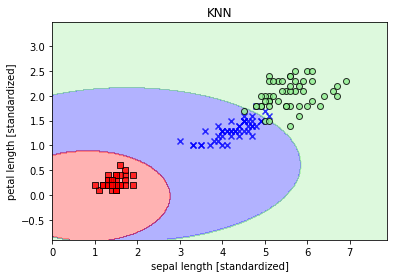

In [74]:
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np
  from Perceptron import plot_decision_regions

  #plt.figure()
  plot_decision_regions(X,y,classifier=nb)
  plt.title('Naive Bayes')
  plt.xlabel('sepal length [standardized]')
  plt.ylabel('petal length [standardized]')
  plt.show()